# Определение перспективного тарифа для телеком-компании

## Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy.stats import levene
plt.style.use('seaborn-deep')
calls = pd.read_csv('/datasets/calls.csv') # Таблица calls (информация о звонках)
internet = pd.read_csv('/datasets/internet.csv') # Таблица internet (информация об интернет-сессиях)
messages = pd.read_csv('/datasets/messages.csv') # Таблица messages (информация о сообщениях)
tariffs = pd.read_csv('/datasets/tariffs.csv') # Таблица tariffs (информация о тарифах)
users = pd.read_csv('/datasets/users.csv') # Таблица users (информация о пользователях)
print('ИНФОРМАЦИЯ О ЗВОНКАХ')
calls.info()
print(calls.head())
print('-----------------------------------')
print('ИНФОРМАЦИЯ ОБ ИНТЕРНЕТ-СЕССИЯХ')
internet.info()
print(internet.head())
print('------------------------------------')
print('ИНФОРМАЦИЯ О СООБЩЕНИЯХ')
messages.info()
print(messages.head())
print('------------------------------------')
print('ИНФОРМАЦИЯ О ТАРИФАХ')
tariffs.info()
print(tariffs.head())
print('------------------------------------')
print('ИНФОРМАЦИЯ О ПОЛЬЗОВАТЕЛЯХ')
users.info()
print(users.head())
print(users)

ИНФОРМАЦИЯ О ЗВОНКАХ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000
-----------------------------------
ИНФОРМАЦИЯ ОБ ИНТЕРНЕТ-СЕССИЯХ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory

## Предобработка данных

In [3]:
calls['duration'] = np.ceil(calls['duration']).astype(int) # округлил минуты до высшего значения и перевёл в формат int
calls['call_date'] = pd.to_datetime(calls['call_date']) # изменил формат даты
print('-----------------------------------')
print('ИНФОРМАЦИЯ О ЗВОНКАХ')
print('-----------------------------------')
display(calls.head())

internet['session_date'] = pd.to_datetime(internet['session_date']) # изменил формат даты
print('-----------------------------------')
print('ИНФОРМАЦИЯ ОБ ИНТЕРНЕТ-СЕССИЯХ')
print('-----------------------------------')
display(internet.head())

users['reg_date'] = pd.to_datetime(users['reg_date']) # изменил формат даты
users['churn_date'] = users['churn_date'].fillna(value='Действует') # заменил Nan на "Действует"
print('-----------------------------------')
print('ИНФОРМАЦИЯ О ПОЛЬЗОВАТЕЛЯХ')
print('-----------------------------------')
display(users.head())

messages['message_date'] = pd.to_datetime(messages['message_date']) # изменил формат даты
print('-----------------------------------')
print('ИНФОРМАЦИЯ О СООБЩЕНИЯХ')
print('-----------------------------------')
display(messages.head())
print('-----------------------------------')






-----------------------------------
ИНФОРМАЦИЯ О ЗВОНКАХ
-----------------------------------


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


-----------------------------------
ИНФОРМАЦИЯ ОБ ИНТЕРНЕТ-СЕССИЯХ
-----------------------------------


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


-----------------------------------
ИНФОРМАЦИЯ О ПОЛЬЗОВАТЕЛЯХ
-----------------------------------


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,Действует,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,Действует,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,Действует,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,Действует,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,Действует,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


-----------------------------------
ИНФОРМАЦИЯ О СООБЩЕНИЯХ
-----------------------------------


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


-----------------------------------


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий студента</b>
Ошибка №1: Неверный формат даты в таблице "calls"
Ошибка №2: Неверный формат даты в таблице "internet"
Ошибка №3: Неверный формат даты в таблице "users"
Ошибка №4: В таблице "users" в столбце "churn_date" пропущенные значения Nan и так как эта колонка отвечает за даты прекращения пользования услугами оператора, то можно предположить что пропуски это действующие абоненты
Ошибка №5: Неверный формат даты в таблице "messages"
    





<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий студента</b>
1: Округление таблицы Internet перенёс в ячейку снизу, так как именно там происходит расчёт суммарного трафика.
   2: Выводы разделил.

## Количество сделанных звонков и израсходованных минут разговора по месяцам.

In [4]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls['month'] = calls['month'].astype('Int64')
#________________________________________________________________________________

calls_pivot = calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()
calls_pivot = calls_pivot.rename(columns={'id' :"calls_count",'duration' :"calls_sum" })
print('-----------------------------------------------')
print('СУММА МИНУТ И КОЛИЧЕСТВО ЗВОНКОВ')
print('-----------------------------------------------')
display(calls_pivot)

-----------------------------------------------
СУММА МИНУТ И КОЛИЧЕСТВО ЗВОНКОВ
-----------------------------------------------


,user_id,month,calls_sum,calls_count
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58
...,...,...,...,...
3169,1498,10,247,41
3170,1499,9,70,9
3171,1499,10,449,68
3172,1499,11,612,74


## Количество отправленных сообщений по месяцам.

In [5]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages['month'] = messages['month'].astype('Int64')
#_________________________________________________________________________________________
# КОЛИЧЕСТВО ОТПРАВЛЕННЫХ СООБЩЕНИЙ
messages_pivot = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()
messages_pivot = messages_pivot.rename(columns={'id' :"messages_count"})
print('----------------------------------')
print('КОЛИЧЕСТВО СООБЩЕНИЙ')
print('----------------------------------')
display(messages_pivot)

----------------------------------
КОЛИЧЕСТВО СООБЩЕНИЙ
----------------------------------


,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


## Объем израсходованного интернет-трафика по месяцам.

In [6]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet['month'] = internet['month'].astype('Int64')
#_________________________________________________________________________________________
# ОБЪЁМ ИНТЕРНЕТ-ТРАФФИКА 
internet_pivot = internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()
internet_pivot = internet_pivot.rename(columns={'mb_used' :"gm_used_sum"})
internet_pivot['gm_used_sum'] = internet_pivot['gm_used_sum'] / 1024 # Перевёл значение в Гигабайты
internet_pivot['gm_used_sum'] = np.ceil(internet_pivot['gm_used_sum']).astype(int) # округлил мегабайты до высшего значения и перевёл в формат int
print('-----------------------------------')
print('СУММА ИНТЕРНЕТ ТРАФФИКА')
print('-----------------------------------')
display(internet_pivot) 

-----------------------------------
СУММА ИНТЕРНЕТ ТРАФФИКА
-----------------------------------


,user_id,month,gm_used_sum
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15
...,...,...,...
3198,1498,10,21
3199,1499,9,2
3200,1499,10,18
3201,1499,11,18


In [9]:
users['month'] = pd.DatetimeIndex(users['reg_date']).month
tariffs = tariffs.rename(columns={'tariff_name' :"tariff"})
data_merge = calls_pivot.merge(messages_pivot, on=['user_id','month'], how='outer')
data_merge = data_merge.merge(internet_pivot, on=['user_id','month'], how = 'outer')
data_merge = data_merge.merge(users, on='user_id', how='left')
data_merge = data_merge.merge(tariffs, on='tariff', how='left')
data_merge['calls_sum'] = data_merge['calls_sum'].fillna(value='0').astype(int)
data_merge['calls_count'] = data_merge['calls_count'].fillna(value='0').astype(int)
data_merge['messages_count'] = data_merge['messages_count'].fillna(value='0').astype(int)
data_merge['gm_used_sum'] = data_merge['gm_used_sum'].fillna(value='0').astype(int)
data_merge['mb_per_month_included'] = data_merge['mb_per_month_included']/1024
data_merge['mb_per_month_included'] = data_merge['mb_per_month_included'].round().astype(int)

      user_id  month  calls_sum  calls_count
0        1000      5        159           22
1        1000      6        172           43
2        1000      7        340           47
3        1000      8        408           52
4        1000      9        466           58
...       ...    ...        ...          ...
3169     1498     10        247           41
3170     1499      9         70            9
3171     1499     10        449           68
3172     1499     11        612           74
3173     1499     12        492           69

[3174 rows x 4 columns]
      user_id  month  messages_count
0        1000      5              22
1        1000      6              60
2        1000      7              75
3        1000      8              81
4        1000      9              57
...       ...    ...             ...
2712     1498     10              42
2713     1499      9              11
2714     1499     10              48
2715     1499     11              59
2716     1499     12        

## Помесячная выручка с каждого пользователя.

In [8]:
data_merge['minutes_overrun']  = data_merge['calls_sum'] - data_merge['minutes_included']
data_merge['messages_overrun'] =  data_merge['messages_count'] - data_merge['messages_included']
data_merge['mb_used_overrun']  =  data_merge['gm_used_sum'] - data_merge['mb_per_month_included']

def get_revenue(row):
    revenue_by_min = 0
    revenue_by_messages = 0
    revenue_mb = 0
    if row['minutes_overrun'] > 0:
        revenue_by_min = row['minutes_overrun'] * row['rub_per_minute'] 
    if row['messages_overrun'] >0:
        revenue_by_messages = row['messages_overrun'] * row['rub_per_message']
    if row['mb_used_overrun'] > 0:
        revenue_mb = row['mb_used_overrun'] * row['rub_per_gb']          
    return revenue_by_min + revenue_by_messages + revenue_mb

data_merge['revenue'] = data_merge.apply(get_revenue,axis=1)
data_merge['revenue'] = data_merge['revenue'] + data_merge['rub_monthly_fee']# прибавил абонентску плату к доходу
print('-----------------------------------')
print('ОБЩАЯ ТАБЛИЦА')
print('-----------------------------------')
display(data_merge.head())
data_merge_smart = data_merge.query('tariff  == "smart"') #ТАРИФФ СМАРТ
data_merge_ultra = data_merge.query('tariff  == "ultra"') # ТАРИФ УЛЬТРА
print('-----------------------------------')
print('СРЕЗ ДЛЯ ТАРИФФА СМАРТ')
print('-----------------------------------')
display(data_merge_smart.head())
print('-----------------------------------')
print('СРЕЗ ДЛЯ ТАРИФФА УЛЬТРА')
print('-----------------------------------')
display(data_merge_ultra.head())

-----------------------------------
ОБЩАЯ ТАБЛИЦА
-----------------------------------


,user_id,month_x,calls_sum,calls_count,messages_count,gm_used_sum,age,churn_date,city,first_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,mb_used_overrun,revenue
0,1000,5,159,22,22,3,52,Действует,Краснодар,Рафаил,...,30,3000,1950,150,1,1,-2841,-978,-27,1950
1,1000,6,172,43,60,23,52,Действует,Краснодар,Рафаил,...,30,3000,1950,150,1,1,-2828,-940,-7,1950
2,1000,7,340,47,75,14,52,Действует,Краснодар,Рафаил,...,30,3000,1950,150,1,1,-2660,-925,-16,1950
3,1000,8,408,52,81,14,52,Действует,Краснодар,Рафаил,...,30,3000,1950,150,1,1,-2592,-919,-16,1950
4,1000,9,466,58,57,15,52,Действует,Краснодар,Рафаил,...,30,3000,1950,150,1,1,-2534,-943,-15,1950


-----------------------------------
СРЕЗ ДЛЯ ТАРИФФА СМАРТ
-----------------------------------


,user_id,month_x,calls_sum,calls_count,messages_count,gm_used_sum,age,churn_date,city,first_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,mb_used_overrun,revenue
8,1001,11,430,59,0,18,41,Действует,Москва,Иван,...,15,500,550,200,3,3,-70,-50,3,1150
9,1001,12,414,63,0,14,41,Действует,Москва,Иван,...,15,500,550,200,3,3,-86,-50,-1,550
10,1002,6,117,15,4,11,59,Действует,Стерлитамак,Евгений,...,15,500,550,200,3,3,-383,-46,-4,550
11,1002,7,214,26,11,18,59,Действует,Стерлитамак,Евгений,...,15,500,550,200,3,3,-286,-39,3,1150
12,1002,8,289,42,13,20,59,Действует,Стерлитамак,Евгений,...,15,500,550,200,3,3,-211,-37,5,1550


-----------------------------------
СРЕЗ ДЛЯ ТАРИФФА УЛЬТРА
-----------------------------------


,user_id,month_x,calls_sum,calls_count,messages_count,gm_used_sum,age,churn_date,city,first_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,mb_used_overrun,revenue
0,1000,5,159,22,22,3,52,Действует,Краснодар,Рафаил,...,30,3000,1950,150,1,1,-2841,-978,-27,1950
1,1000,6,172,43,60,23,52,Действует,Краснодар,Рафаил,...,30,3000,1950,150,1,1,-2828,-940,-7,1950
2,1000,7,340,47,75,14,52,Действует,Краснодар,Рафаил,...,30,3000,1950,150,1,1,-2660,-925,-16,1950
3,1000,8,408,52,81,14,52,Действует,Краснодар,Рафаил,...,30,3000,1950,150,1,1,-2592,-919,-16,1950
4,1000,9,466,58,57,15,52,Действует,Краснодар,Рафаил,...,30,3000,1950,150,1,1,-2534,-943,-15,1950


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий студента</b>
1: Прибавил абонентскую плату после работы функции.
   2: Теперь все значения отрицательные.

## Cреднее количество, дисперсия и стандартное отклонение минут.

   СРЕДНЕЕ   СТД.ОТКЛОН  ДИСПЕРСИЯ
       ↓         ↓       ↓


,mean,std,var
,calls_sum,calls_sum,calls_sum
tariff,,,
smart,417,190,36219
ultra,526,317,100873


___________________________________________________


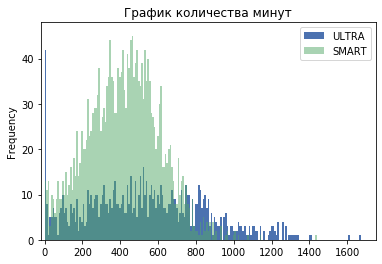

In [9]:
#СРЕДНЕЕ КОЛИЧЕСТВО МИНУТ РАЗГОВОРА
data_merge_tariff_minutes = (data_merge.pivot_table(index = 'tariff',
                                                        values = 'calls_sum', aggfunc=['mean','std','var'])
                                                        )
print('   СРЕДНЕЕ','  СТД.ОТКЛОН',' ДИСПЕРСИЯ')
print('       ↓','        ↓','      ↓')
display(data_merge_tariff_minutes.astype(int))
print('___________________________________________________')
plt.ylim(0, 48) 
plt.xlim(-20, 1750) 
(data_merge_ultra['calls_sum'].plot(bins=200,kind = 'hist', 
                                   range = (0, 1673),label = 'ULTRA',
                                   legend=True, title = 'График количества минут'))
(data_merge_smart['calls_sum'].plot(bins=200,kind = 'hist', alpha = 0.5,
                                   range = (0,1673),label = 'SMART',
                                  legend=True, title = 'График количества минут'))
plt.show()


<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> Комментарий студента</b>
Среднее количество минут и абонентов обоих тариффов 417 у смарт против 526 у ультра, но рапределение совсем разноеБ смарт пик 400 - 600 минут , ультра же более плавное течение впплоть за 1000 минут.    
</div>   

## Cреднее количество, дисперсия и стандартное отклонение сообщений.

    СРЕДНЕЕ      СТД.ОТКЛОН     ДИСПЕРСИЯ
       ↓              ↓             ↓


,mean,std,var
,messages_count,messages_count,messages_count
tariff,,,
smart,33,28,796
ultra,49,47,2285


___________________________________________________


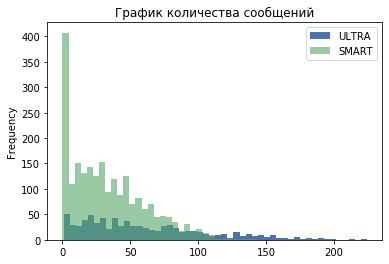

In [10]:
# КОЛИЧЕСТВО СООБЩЕНИЙ ДЛЯ ТАРИФФА ULTRA
data_merge_tariff_messages = (data_merge.pivot_table(index = 'tariff',
                                                         values = 'messages_count', aggfunc = ['mean','std','var'])
                                                         )
print('    СРЕДНЕЕ','     СТД.ОТКЛОН','    ДИСПЕРСИЯ')
print('       ↓','             ↓','            ↓')
display(data_merge_tariff_messages.astype(int))
print('___________________________________________________')

(data_merge_ultra['messages_count'].plot(bins=50,kind = 'hist',
                                         range = (1, 224),label = 'ULTRA',
                                        legend=True, title = 'График количества сообщений'))
(data_merge_smart['messages_count'].plot(bins=50,kind = 'hist',alpha = 0.6,
                                         range = (0, 224),label = 'SMART',
                                         legend=True, title = 'График количества сообщений'))
plt.show()

<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> Комментарий студента</b>
У абонентов смарт очень велика доля тех кто воовсе не пользуется смс или пользуется, у абонентов ультра нет пиков , а более плавное рапределение от низкого к большому и от этого среднее количество у них больше.
</div>    

## Cреднее количество, дисперсия и стандартное отклонение интернет-трафика .

    СРЕДНЕЕ    СТД.ОТКЛОН    ДИСПЕРСИЯ
       ↓           ↓            ↓


,mean,std,var
,gm_used_sum,gm_used_sum,gm_used_sum
tariff,,,
smart,16,5,33
ultra,19,9,97


___________________________________________________


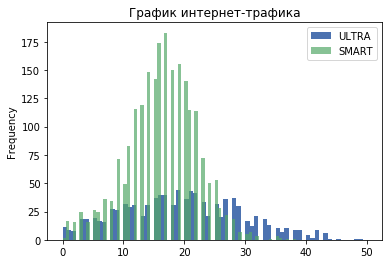

In [11]:
# ИНТЕРНЕТ-ТРАФФИК ДЛЯ ТАРИФФА SMART
data_merge_tariff_internet = (data_merge.pivot_table(index = 'tariff',
                                                          values = 'gm_used_sum', aggfunc = ['mean','std','var'])
                                                     )
print('    СРЕДНЕЕ','   СТД.ОТКЛОН','   ДИСПЕРСИЯ')
print('       ↓','          ↓','           ↓')
display(data_merge_tariff_internet.astype(int))
print('___________________________________________________')

data_merge_ultra['gm_used_sum'].plot(bins=70,kind = 'hist', range = (0, 50),label = 'ULTRA',legend=True, title = 'График интернет-трафика')
data_merge_smart['gm_used_sum'].plot(bins=90,alpha = 0.7,kind = 'hist', range = (0, 50),label = 'SMART',legend=True, title = 'График интернет-трафика')
plt.show()


<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> Комментарий студента</b>
В среднем абоненты тариффа ультра и смарт потребляют 16 и 19 гб интернет-трафика, что не такая уж и большая разница, но судя по гистограмме абоненты смарт чаще употребляют примерно от 12 до 22 гб чего не скажешь про абонентов ультра,пиковая область для них около 20 и нет уж и редко встречаются те кто доходит и до 25 и даже до 40 чего у абонентов смарт практически не наблюдается.
</div>    

## Проверка гипотез.

## Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

In [12]:
data_merge_smart_revenue = data_merge_smart['revenue'] #ДОХОД ДЛЯ ТАРИФФА СМАРТ
data_merge_ultra_revenue = data_merge_ultra['revenue'] #ДОХОД ДЛЯ ТАРИФФА УЛЬТРА
q = (len(data_merge_ultra_revenue)) # размер выборки для тариффа ультра
print('-------------------------------------------')
print(f'ПОДСЧЁТ ВЫБОРКИ ДЛЯ ТАРИФФА ULTRA:: {q:.2f}')
print('-------------------------------------------')
print('')
k = (len(data_merge_smart_revenue)) # размер выборки для тариффа смарт
print('-------------------------------------------')
print(f'ПОДСЧЁТ ВЫБОРКИ ДЛЯ ТАРИФФА SMART:: {k:.2f}')
print('-------------------------------------------')
print('')
stat, p = levene(data_merge_smart_revenue, data_merge_ultra_revenue)
print('-------------------------------------------------------------------')
print('СРАВНЕНИЕ ДИСПЕРСИЙ ВЫБОРОК МЕТОДОМ ЛЕВЕНЕ:', p)
print('-------------------------------------------------------------------')



-------------------------------------------
ПОДСЧЁТ ВЫБОРКИ ДЛЯ ТАРИФФА ULTRA:: 985.00
-------------------------------------------

-------------------------------------------
ПОДСЧЁТ ВЫБОРКИ ДЛЯ ТАРИФФА SMART:: 2229.00
-------------------------------------------

-------------------------------------------------------------------
СРАВНЕНИЕ ДИСПЕРСИЙ ВЫБОРОК МЕТОДОМ ЛЕВЕНЕ: 1.8783148636310733e-122
-------------------------------------------------------------------


<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> Комментарий студента</b>
В теории сказанно: Иногда советуют предварительно проверить равенство дисперсий специальными тестами (например, тестом Левене). Мы не рекомендуем так делать: исследования показывают, что это только увеличивает вероятность сделать неверный вывод.
Так что «правило большого пальца» тут простое: если выборки разного размера и/или можно предположить, что дисперсии у генеральных совокупностей разные — укажите equal_var = False при вызове метода scipy.stats.ttest_ind().
В остальных случаях используйте тест без изменений.
По подсчёту выборок вы видим что они не равны и исходя из этого имеем право использовать метод equal_var = False задающий, считать ли равными дисперсии выборок. 
</div> 

<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> Комментарий студента</b>
Нулевая гипотеза: Средняя выручка для тариффа ультра меньше чем для смарт.
Альтернативная гипотеза: Средняя выручка для тариффа ультра больше чем для смарт.
Выбрана эта гипотеза потому что наша цель выяснить какой тарифф приносит больше денег и на какой потратить рекламный бюджет.
В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind()], выберем параметр equal_var = False потому что размер двух выборок не одинаков     
</div>     

In [13]:
alpha =.05

results = st.ttest_ind(
    data_merge_smart_revenue, 
    data_merge_ultra_revenue, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> Комментарий студента</b>

Отвергаем нулевую гипотезу потому что статистически значимое число заданное нами меньше числа которое выдал нам - тест.

   
</div>    

## Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов .

In [14]:
moscow = data_merge.query('city  == "Москва"')['revenue'] # CРЕЗ ДЛЯ ДОХОДА ПО ГОРОДУ МОСКВЕ
regions = data_merge.query('city  != "Москва"')['revenue']# СРЕЗ ДЛЯ ДОХОДА ПО ВСЕМ РЕГИОНАМ КРОМЕ МОСКВЫ
q = (len(moscow))
print('-------------------------------------------')
print(f'ПОДСЧЁТ ВЫБОРКИ ДЛЯ МОСКВЫ: {q:.2f}')
print('-------------------------------------------')
print('')
k = (len(regions))
print('-------------------------------------------')
print(f'ПОДСЧЁТ ВЫБОРКИ ДЛЯ РЕГИОНОВ: {k:.2f}')
print('-------------------------------------------')
print('')
stat, p = levene(moscow, regions)
print('-------------------------------------------------------------------')
print('СРАВНЕНИЕ ДИСПЕРСИЙ ВЫБОРОК МЕТОДОМ ЛЕВЕНЕ:', p)
print('-------------------------------------------------------------------')

-------------------------------------------
ПОДСЧЁТ ВЫБОРКИ ДЛЯ МОСКВЫ: 611.00
-------------------------------------------

-------------------------------------------
ПОДСЧЁТ ВЫБОРКИ ДЛЯ РЕГИОНОВ: 2603.00
-------------------------------------------

-------------------------------------------------------------------
СРАВНЕНИЕ ДИСПЕРСИЙ ВЫБОРОК МЕТОДОМ ЛЕВЕНЕ: 0.014082487123270156
-------------------------------------------------------------------


<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> Комментарий студента</b>
В теории сказанно: Иногда советуют предварительно проверить равенство дисперсий специальными тестами (например, тестом Левене). Мы не рекомендуем так делать: исследования показывают, что это только увеличивает вероятность сделать неверный вывод.
Так что «правило большого пальца» тут простое: если выборки разного размера и/или можно предположить, что дисперсии у генеральных совокупностей разные — укажите equal_var = False при вызове метода scipy.stats.ttest_ind().
В остальных случаях используйте тест без изменений.
По подсчёту выборок вы видим что они не равны и исходя из этого имеем право использовать метод equal_var = False задающий, считать ли равными дисперсии выборок. 
</div> 

<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> Комментарий студента</b>
Нулевая гипотеза: Средняя выручка пользователей из москвы ровна выручке пользователей из других регонов.
Альтернативная гипотеза: Средняя выручка пользователей из Москвы не ровна средней выручке пользователей из других регионов.
Такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны.
В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(), выберем параметр equal_var = False потому что размер двух выборок не одинаков     
</div>  

In [15]:
alpha = .05

results = st.ttest_ind(
    moscow, 
    regions,equal_var = False) 

print('p-значение:',  results.pvalue)

if results.pvalue < alpha:

    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> Комментарий студента</b>
Мы видим что не получается отвернуть нулевую гипотезу потому что статистически значимое число заданное нами оказалось меньше того что выдал нам т-тест.

   
</div>    

<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> ОБЩИЙ ВЫВОД</b>
Проведенное мною исследование и анализ говорит о том что тарифф ультра более предпочтителен с точки зрения проведения рекламной компании) 
</div>    